# 日経平均株価 (^N225)

In [69]:
import datetime as dt
#import japanize_matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import mplfinance as mpf
import yfinance as yf

# Matplotlib用に日本語フォントの設定
FONT_PATH = '../fonts/RictyDiminished-Regular.ttf'
fm.fontManager.addfont(FONT_PATH)

font_prop = fm.FontProperties(fname=FONT_PATH)
plt.rcParams['font.family'] = font_prop.get_name()
font_prop.get_name()

'Ricty Diminished'

In [70]:
class Target:
    symbol = None
    name = None

In [71]:
target = Target()
target.symbol = '^N225'
target.name = '日経平均株価'
ticker = yf.Ticker(target.symbol)

## 過去６ヶ月の日足データ

In [72]:
df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-09 00:00:00+09:00,36915.441406,37287.261719,36807.031250,36897.421875,146800000,0.0,0.0
2024-02-13 00:00:00+09:00,37248.359375,38010.691406,37184.101562,37963.968750,140500000,0.0,0.0
2024-02-14 00:00:00+09:00,37712.871094,37825.851562,37594.468750,37703.320312,120300000,0.0,0.0
2024-02-15 00:00:00+09:00,38017.828125,38188.738281,37935.359375,38157.941406,130000000,0.0,0.0
2024-02-16 00:00:00+09:00,38517.371094,38865.058594,38361.550781,38487.238281,151700000,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-05 00:00:00+09:00,35249.359375,35301.179688,31156.119141,31458.419922,285600000,0.0,0.0
2024-08-06 00:00:00+09:00,32077.330078,34911.800781,32077.330078,34675.460938,251200000,0.0,0.0
2024-08-07 00:00:00+09:00,34122.351562,35849.769531,33739.460938,35089.621094,242800000,0.0,0.0


### ローソク足チャートと出来高

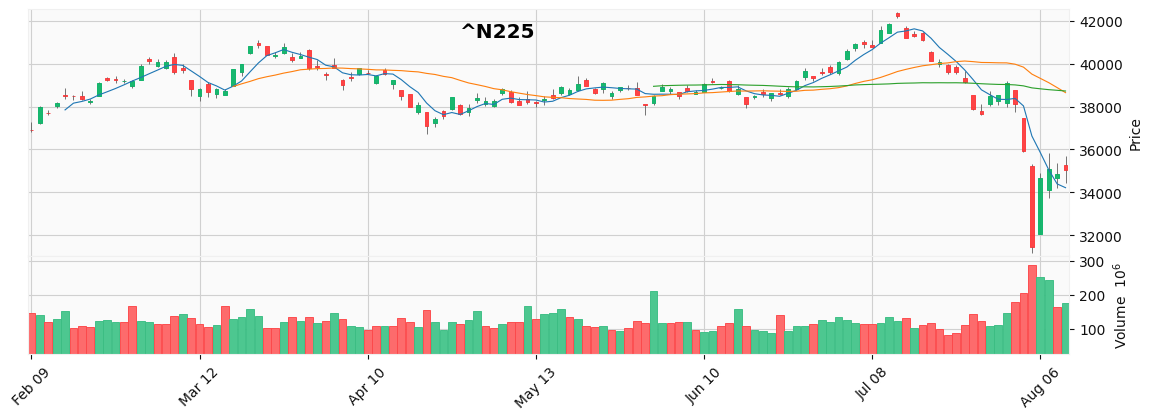

In [73]:
mpf.plot(
    df, type='candle', style='yahoo', mav=(5, 25, 75),
    volume=True,
    title=target.symbol,
    figsize=(12, 4),
    tight_layout=True
)

plt.show()

### ローソク足チャートと出来高、モメンタム

Reference: https://mekatana.com/python-momentum/

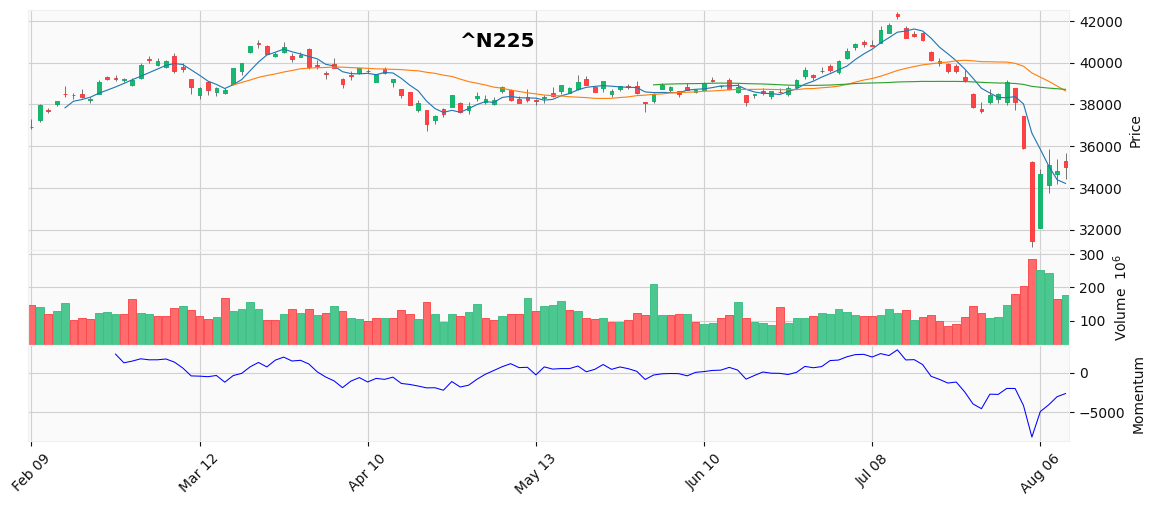

In [74]:
# モメンタム
period = 10
df['momentum'] = df['Close'] - df['Close'].shift(period)

apd_roscillator = [
    mpf.make_addplot(df['momentum'], panel=2, ylabel='Momentum', color='b', width=0.75)
]

# チャート描写
mpf.plot(
    df, type='candle', style='yahoo', mav=(5, 25, 75),
    volume=True,
    addplot=apd_roscillator,
    title=target.symbol,
    figsize=(12, 5),
    tight_layout=True
)


### ローソク足チャートとボリンジャーバンド

Reference: https://mekatana.com/bollinger-bands-python/

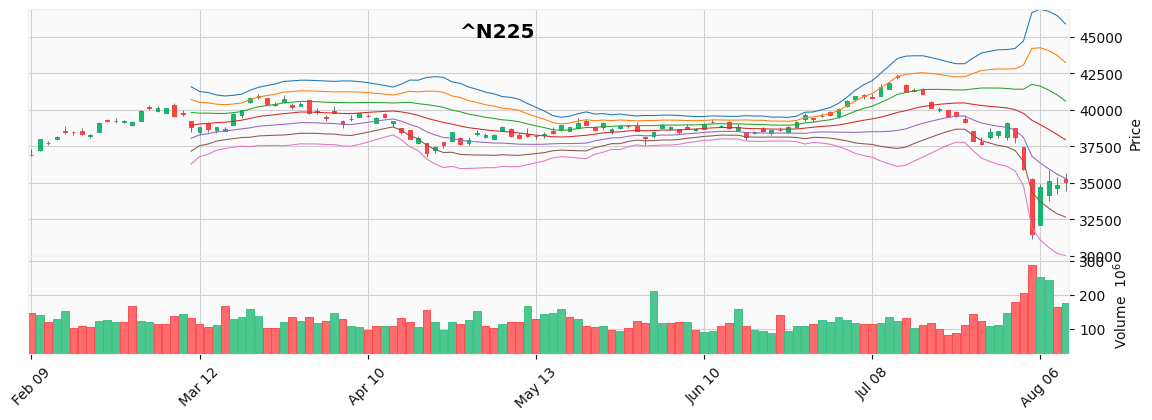

In [75]:
period = 20
r = df['Close'].rolling(period)    
df['upper3'] = r.mean() + 3 * r.std()
df['upper2'] = r.mean() + 2 * r.std()
df['upper1'] = r.mean() + 1 * r.std()
df['mean'] = r.mean()
df['lower1'] = r.mean() - 1 * r.std()
df['lower2'] = r.mean() - 2 * r.std()
df['lower3'] = r.mean() - 3 * r.std()

df_upper3_max=df['upper3'].max() + 10
df_lower3_min=df['lower3'].min() - 10 

apd_oscilator  = [
    mpf.make_addplot(df[['upper3', 'upper2', 'upper1','mean', 'lower1', 'lower2', 'lower3']], width=0.75)
]   

mpf.plot(
    df, type='candle', style='yahoo',
    volume=True,
    title=target.symbol,
    addplot=apd_oscilator,
    ylim=(df_lower3_min, df_upper3_max),
    figsize=(12, 4),
    tight_layout=True,
)

### フィボナッチ・リトレースメント

In [76]:
price_max = max(df['High'])
df_max = df[df['High'] == price_max]
ts_max = df_max.index[0]
print(ts_max, price_max)

2024-07-11 00:00:00+09:00 42426.76953125


In [77]:
price_min = min(df['Low'])
df_min = df[df['Low'] == price_min]
ts_min = df_min.index[0]
print(ts_min, price_min)

2024-08-05 00:00:00+09:00 31156.119140625


In [78]:
delta = price_max - price_min
level1 = price_min + 0.236 * delta
level2 = price_min + 0.382 * delta
level3 = price_min + 0.618 * delta

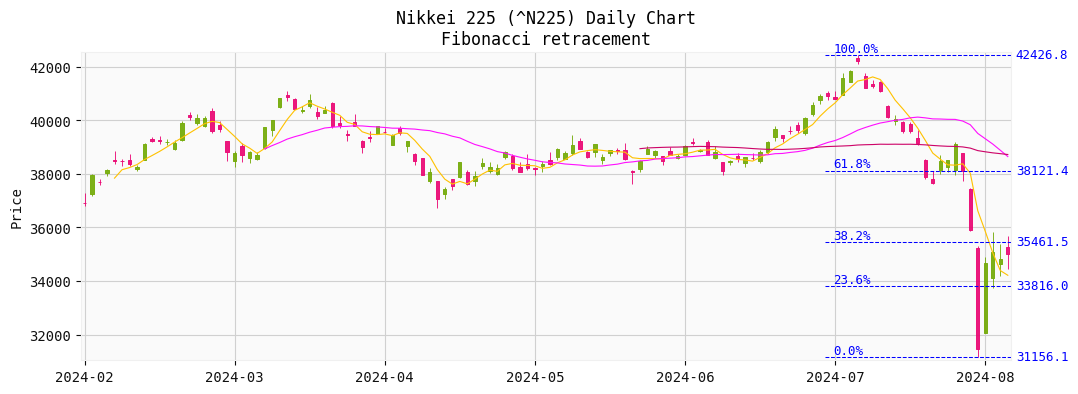

In [79]:
plt.rcParams['font.family'] = 'monospace'
fig, ax = plt.subplots(figsize=(12, 4))

mpf.plot(
    df,
    type='candle',
    style='binance',
    datetime_format='%Y-%m',
    xrotation=0,
    mav=(5, 25, 75),
    tight_layout=True,
    ax=ax,
)

# フィボナッチリトレースメント
x_start = 0.8
x_left = ax.get_xlim()[0]
x_right = ax.get_xlim()[1]
x_mid = (x_right - x_left) * (x_start + 0.005)
x_delta = x_right - x_left
x_adjust = x_delta * 0.005
 
y_min = ax.get_ylim()[0]
y_max = ax.get_ylim()[1]
y_delta = y_max - y_min
y_adjust = y_delta * 0.01
 
for y, v in zip([price_min, level1, level2, level3, price_max],[0, 23.6, 38.2, 61.8, 100]):
    plt.axhline(y, xmin=x_start, linestyle = 'dashed', linewidth=0.75, color = 'b')
    plt.text(x_right + x_adjust, y - y_adjust, '%.1f' % y, color='b', fontsize=9)
    plt.text(x_mid, y + y_adjust, '%.1f%%' % v, color='b', fontsize=9)

plt.title('Nikkei 225 (^N225) Daily Chart\nFibonacci retracement')
plt.savefig('n255_fibonacci.png')
plt.show()